This exercise consists in analyzing a dataset containg timing information from a series of Time-to-Digital-Converters (TDC) implemented in a pair of FPGAs. Each measurement (i.e. each row of the input file) consists of a flag that specifies the type of message ('HEAD', which in this case is always 1), two addresses of the TDC providing the signal ('FPGA' and 'TDC_CHANNEL'), and the timing information ('ORBIT_CNT', 'BX_COUNTER', and 'TDC_MEAS'). Each TDC count corresponds to 25/30 ns, whereas a unit of BX_COUNTER corresponds to 25 ns, and the ORBIT_CNT is increased every 'x' BX_COUNTER. This allows to store the time in a similar way to hours, minutes and seconds.

In [1]:
#importing libraries
import pandas as pd 
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt

In [3]:
!wget https://www.dropbox.com/s/xvjzaxzz3ysphme/data_000637.txt -P ./data/

--2021-12-01 13:42:24--  https://www.dropbox.com/s/xvjzaxzz3ysphme/data_000637.txt
Risoluzione di www.dropbox.com (www.dropbox.com)... 162.125.69.18
Connessione a www.dropbox.com (www.dropbox.com)|162.125.69.18|:443... connesso.
Richiesta HTTP inviata, in attesa di risposta... 301 Moved Permanently
Posizione: /s/raw/xvjzaxzz3ysphme/data_000637.txt [segue]
--2021-12-01 13:42:25--  https://www.dropbox.com/s/raw/xvjzaxzz3ysphme/data_000637.txt
Riutilizzo della connessione esistente a www.dropbox.com:443.
Richiesta HTTP inviata, in attesa di risposta... 302 Found
Posizione: https://uc534306b590eaa0cd61cb3370e8.dl.dropboxusercontent.com/cd/0/inline/BbC_bKfykUeL7LgalthWjUqCCG_trPcpqw7mdkgqDIlIhd8WKnaGf_NzdppjzPV_jp072n9wFP3Qgska5ziAJfyNtK97zxJJuLN4Ju92etVhmYJKxT1F5_QzBx7rR3jbLeixXxQwA29_Dvgpdrwsbvto/file# [segue]
--2021-12-01 13:42:25--  https://uc534306b590eaa0cd61cb3370e8.dl.dropboxusercontent.com/cd/0/inline/BbC_bKfykUeL7LgalthWjUqCCG_trPcpqw7mdkgqDIlIhd8WKnaGf_NzdppjzPV_jp072n9wFP3Qgska5

1\. Create a Pandas DataFrame reading N rows of the `data/data_000637.txt` dataset. Choose N to be smaller than or equal to the maximum number of rows and larger that 10k (check the documentation).

In [6]:
file_name = './data/data_000637.txt'
data = pd.read_csv(file_name)
print(data)

         HEAD  FPGA  TDC_CHANNEL   ORBIT_CNT  BX_COUNTER  TDC_MEAS
0           1     0          123  3869200167        2374        26
1           1     0          124  3869200167        2374        27
2           1     0           63  3869200167        2553        28
3           1     0           64  3869200167        2558        19
4           1     0           64  3869200167        2760        25
...       ...   ...          ...         ...         ...       ...
1310715     1     0           62  3869211171         762        14
1310716     1     1            4  3869211171         763        11
1310717     1     0           64  3869211171         764         0
1310718     1     0          139  3869211171         769         0
1310719     1     0           61  3869211171         762        18

[1310720 rows x 6 columns]


In [7]:
#since n max rows = 1310720

N = np.random.randint(1000,len(data))
data_part = pd.read_csv(file_name, nrows = N)

print(data_part)

        HEAD  FPGA  TDC_CHANNEL   ORBIT_CNT  BX_COUNTER  TDC_MEAS
0          1     0          123  3869200167        2374        26
1          1     0          124  3869200167        2374        27
2          1     0           63  3869200167        2553        28
3          1     0           64  3869200167        2558        19
4          1     0           64  3869200167        2760        25
...      ...   ...          ...         ...         ...       ...
957315     1     0           64  3869208738         838         5
957316     1     0           59  3869208738         851        20
957317     1     0          139  3869208738         853         0
957318     1     0           62  3869208738         852        22
957319     1     0           61  3869208738         854         1

[957320 rows x 6 columns]


2\. Estimate the number of BX in a ORBIT (the value 'x').

In [8]:
x = np.max(data['BX_COUNTER'])+1
print('The number of BX in a ORBIT is',x)

The number of BX in a ORBIT is 3564


3\. Find out the duration of the data taking in hours, minutes and seconds. You can either make an estimate based on the fraction of the measurements (rows) you read, or perform this check precisely by reading the whole dataset.

In [9]:
data = pd.read_csv('./data/data_000637.txt')
def convertToSeconds(data):
    tSec = data['TDC_MEAS']*25/30 + 25*data['BX_COUNTER'] + 3564*25*data['ORBIT_CNT'] 
    return tSec

ActualTime = convertToSeconds(data)
deltaT = (ActualTime.max() - ActualTime.min())*1e-9

print('The duration of the data taking estimated is', deltaT, 'seconds')

The duration of the data taking estimated is 0.9804162533125 seconds


4\. Create a new column with the absolute time in ns (as a combination of the other three columns with timing information) since the beginning of the data acquisition.

In [10]:
data["Absolute time [ns]"] = data['TDC_MEAS'] * 25 / 30 + data['BX_COUNTER'] * 25 + 3564*25*data['ORBIT_CNT']
data

,HEAD,FPGA,TDC_CHANNEL,ORBIT_CNT,BX_COUNTER,TDC_MEAS,Absolute time [ns]
0,1,0,123,3869200167,2374,26,3.447457e+14
1,1,0,124,3869200167,2374,27,3.447457e+14
2,1,0,63,3869200167,2553,28,3.447457e+14
3,1,0,64,3869200167,2558,19,3.447457e+14
4,1,0,64,3869200167,2760,25,3.447457e+14
...,...,...,...,...,...,...,...
1310715,1,0,62,3869211171,762,14,3.447467e+14
1310716,1,1,4,3869211171,763,11,3.447467e+14
1310717,1,0,64,3869211171,764,0,3.447467e+14
1310718,1,0,139,3869211171,769,0,3.447467e+14


5\. Use the `.groupby()` method to find out the noisy channels, i.e. the TDC channels with most counts (print to screen the top 3 and the corresponding counts)

In [11]:
#data

data1 = data.groupby('TDC_CHANNEL').count()
data1.sort_values( 'HEAD', ascending = False)

print(data1.head(3))


              HEAD   FPGA  ORBIT_CNT  BX_COUNTER  TDC_MEAS  Absolute time [ns]
TDC_CHANNEL                                                                   
1            29653  29653      29653       29653     29653               29653
2            34271  34271      34271       34271     34271               34271
3            23463  23463      23463       23463     23463               23463


6\. Count the number of non-empty orbits (i.e. the number of orbits with at least one hit). Count also the number of unique orbits with at least one measurement from TDC_CHANNEL=139.

In [12]:
# hit = entry in the data frame 
GroupingORBIT = data.groupby('ORBIT_CNT')
print('Non empty orbits number is equal to', len(GroupingORBIT))


TDC139 = data[data['TDC_CHANNEL'] == 139].groupby('ORBIT_CNT')
print('Unique orbits with at least one TDC_channel equal to 139 are', len(TDC139))

Non empty orbits number is equal to 11001
Unique orbits with at least one TDC_channel equal to 139 are 10976


7\. **Optional:** Make two occupancy plots (one for each FPGA), i.e. plot the number of counts per TDC channel

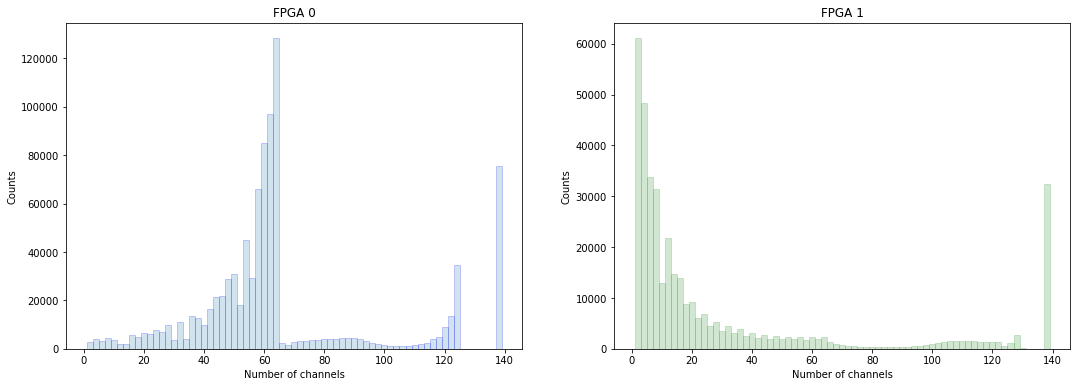

In [23]:
# Plot counts for each channel

fig,((ax0,ax1)) = plt.subplots(1,2,figsize=(18,6))

#set labels
ax0.set_xlabel('Number of channels')
ax0.set_ylabel('Counts')

ax1.set_xlabel('Number of channels')
ax1.set_ylabel('Counts')

#set titles
ax0.set_title('FPGA 0')
ax1.set_title('FPGA 1')

#producing plots
ax0.hist(data[data.FPGA != 1].loc[:,'TDC_CHANNEL'], bins = data[data.FPGA != 1].loc[:,'TDC_CHANNEL'].max()//2, alpha=0.2,edgecolor='blue')
ax1.hist(data[data.FPGA != 0].loc[:,'TDC_CHANNEL'], bins = data[data.FPGA != 0].loc[:,'TDC_CHANNEL'].max()//2, alpha=0.2, edgecolor='forestgreen', color='forestgreen')

plt.show()